In [8]:
import importlib

import pandas as pd
import numpy as np
from classify import compute_classification_metrics
from utils.db_tools import metrics_grid, get_data
from scipy.fft import fft, fftfreq

import utils.db_tools as db_tools
importlib.reload(db_tools)

<module 'utils.db_tools' from '/cluster/home/vogtva/pde-solvers-cuda/analysis/utils/db_tools.py'>

In [9]:
df1 = pd.read_csv('sample_data/osc.csv')
df1["label"] = "osc"
df2 = pd.read_csv('sample_data/ss.csv')
df2["label"] = "ss"
df2.loc[23, "label"] = "dss"

In [10]:
osc_rows = np.r_[0:4, 6:9, 10, 13:20, 21:28, 29, 31:34, 35, 37, 39:48, 49:52, 53, 55:58, 59]

In [11]:
df_mix = pd.read_csv('sample_data/mix.csv')
df_mix_osc = df_mix.iloc[osc_rows]
df_mix_osc["label"] = "osc"

df_dss = df_mix.drop(index=osc_rows)
df_dss["label"] = "dss"

/scratch/tmp.24276740.vogtva/ipykernel_3990089/1078900742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix_osc["label"] = "osc"


In [22]:
df.columns

Index(['index', 'Unnamed: 0', 'model', 'A', 'B', 'Nx', 'dx', 'Nt', 'dt', 'Du',
       'Dv', 'initial_condition', 'random_seed', 'n_snapshots', 'filename',
       'run_id', 'original_point', 'final_deviation', 'mean_deviation',
       'std_deviation', 'max_derivative', 'mean_derivative', 'dominant_power',
       'total_power', 'max_u', 'max_v', 'category', 'op', 'ic', 'label',
       'max_dx', 'mean_dx', 'max_dt', 'mean_dt'],
      dtype='object')

In [12]:
df = pd.concat([df1, df2, df_mix_osc, df_dss])
df = df.reset_index();

In [13]:
df = compute_classification_metrics(df, start_frame=0)

In [24]:
df_filt = df[df.label == "ss"]
print(df_filt[["mean_deviation"]].to_string())

    mean_deviation
31        0.000112
32        0.000054
33        0.000046
34        0.000043
35        0.000066
36        0.000041
37        0.000033
38        0.000031
39        0.000038
40        0.000066
41        0.000056
42        0.000043
43        0.000046
44        0.000099
45        0.000066
46        0.000058
47        0.000062
48        0.000092
49        0.000065
50        0.000051
51        0.000080
52        0.000047
53        0.000069
55        0.000045
56        0.000048
57        0.000065
58        0.000034
59        0.000049
60        0.000053
61        0.000048
62        0.000046
63        0.000100
64        0.000037
65        0.000033
66        0.000054
67        0.000064
68        0.000049
69        0.000083
70        0.000092
71        0.000070
72        0.000046
73        0.000029
74        0.000031
75        0.000042
76        0.000069
77        0.000038
78        0.000077
79        0.000032
80        0.000062
81        0.000030
82        0.000035
83        0.

In [15]:
dt = df.iloc[0]["dt"]

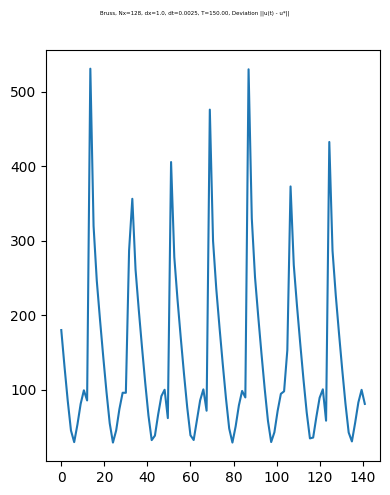

array([[<Axes: >]], dtype=object)

In [16]:
metrics_grid(df.loc[11:11],5,var1="", metric="dev")

In [17]:
x = np.arange(0, 100, 0.1)
u = 0.1 * np.sin(2 * np.pi * x / 10)
u = u + np.random.normal(0, 0.1, len(x))
fft_u = np.abs(fft(u)) / len(u)
fft_u[0] = 0  # Ignore DC component
np.max(fft_u)

0.047972288934993355